In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('2023_generales_1/2023_Generales/ResultadoElectorales_2023_Generales.csv')

C:\Users\Cami\AppData\Local\Temp\ipykernel_17556\3205040125.py:1: DtypeWarning: Columns (9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2023_generales_1/2023_Generales/ResultadoElectorales_2023_Generales.csv')


In [4]:
df_g9 = df[df['distrito_nombre'] == 'Buenos Aires']
df_g9 = df_g9[(df_g9['seccionprovincial_nombre'] == 'Sección Segunda') | \
                                (df_g9['seccionprovincial_nombre'] == 'Sección Capital') | \
                                (df_g9['seccionprovincial_nombre'] == 'Sección Séptima') ]
df_g9.reset_index(drop=True)

,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,98
1,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,132,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,71
2,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,71
3,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,133,HACEMOS POR NUESTRO PAIS,NaN,NaN,POSITIVO,13
4,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,NaN,NaN,POSITIVO,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330054,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,EN BLANCO,13
330055,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,NULO,0
330056,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,IMPUGNADO,0
330057,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,RECURRIDO,0


In [5]:
print(df_g9['seccionprovincial_id'].unique(), df_g9['seccionprovincial_nombre'].unique(), df_g9['seccionprovincial_nombre'].nunique())

[7. 2. 8.] ['Sección Séptima' 'Sección Segunda' 'Sección Capital'] 3


### Unicidad

In [6]:
df_agrupaciones = df_g9[df_g9['agrupacion_id'] > 0] #Filtramos los votos en blanco, nulo, impugnado, recurrido y comando
df_group = df_agrupaciones.groupby(['seccionprovincial_id','seccion_id','mesa_id','cargo_id','agrupacion_id'])
df_group.count()
print((df_group['año'].count() == 1).all()) #Por cada mesa cada agrupacion figura una sola vez.

True


### Coherencia

In [7]:
df_group2 = df_g9.groupby(['seccionprovincial_id','seccion_id','mesa_id','cargo_id'])
#print((df_group['año'].count() == 1).all()) #Por cada mesa cada agrupacion figura una sola vez.
df_group2
#Por mesa hay menos o igual votos que la cantidad de electores
cantidad_coherente = True
for name, group in df_group2:
    if not(group['votos_cantidad'].sum() <= group['mesa_electores'].iloc[0]):
        cantidad_coherente = False
print(cantidad_coherente)

True


## Analisis

###### Efectuar un análisis descriptivo de los resultados para cada categoría en cada sección de las unidades geográficas asignadaa para el cargo de presidente / vice, diputados nacionales y senadores nacionales.

In [238]:
agrupaciones = df_g9['agrupacion_nombre'].unique()
groups_of_values = []
for a in agrupaciones:
    query = 'agrupacion_nombre == "{x}"'.format(x=a)
    query_res = df_g9.query(query)
    monto_por_s= query_res.groupby(['cargo_id'])['votos_cantidad'].sum()
    groups_of_values.append(monto_por_s.values)
print(groups_of_values)

[array([408805, 386428, 381486, 414975, 329794,  66326, 411913, 386251,
       383520], dtype=int64), array([319744, 330131, 330961, 341427, 279331,  63666, 401926, 326969,
       329172], dtype=int64), array([303653, 270039, 269533, 265169, 210045,  52814, 212543, 269956,
       266383], dtype=int64), array([52581, 44369], dtype=int64), array([32226, 36373, 37896, 33048, 31847,  4321, 29169, 34692, 36206],
      dtype=int64), array([], dtype=int64), array([1919], dtype=int64), array([3361], dtype=int64), array([1912], dtype=int64), array([2108], dtype=int64), array([3839], dtype=int64)]


<Axes: >

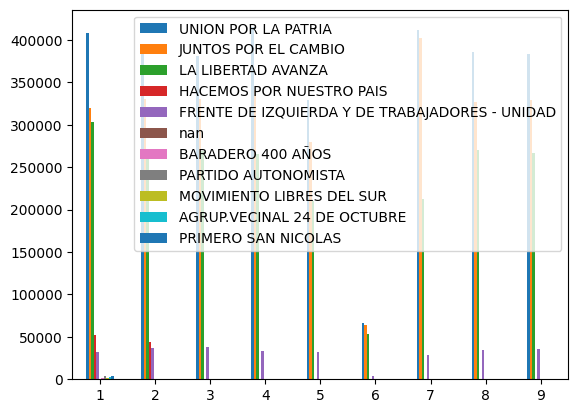

In [239]:
#Plotear grafico de barras
plot_df = pd.DataFrame(groups_of_values, index=s_groups).T
plot_df = plot_df.set_axis(df_g9['cargo_id'].unique().tolist(), axis=0)
plot_df.plot.bar(rot= 0)

In [228]:
agrupaciones = df_g9['agrupacion_nombre'].unique()
votos_por_agrupacion = []
for a in agrupaciones:
    #query = 'cargo_id == "{x}"'.format(x=c)
    #query_res = df_g9.query(query)
    df_agrupacion_a = df_g9[df_g9['agrupacion_nombre']==a]
    votos_por_cargo = []
    for c in df_g9['cargo_nombre'].unique():
        #monto_por_s= query_res.groupby(['agrupacion_nombre'])['votos_cantidad'].sum()
        df_agrupacion_a_cargo_c = df_agrupacion_a[df_agrupacion_a['cargo_nombre']==c]
        #print(a, df_cargo_c_ag_a['votos_cantidad'].sum()) 
        votos_por_cargo.append(df_agrupacion_a_cargo_c['votos_cantidad'].sum())
        
    votos_por_agrupacion.append(votos_por_cargo)
    
print(votos_por_agrupacion)

[[408805, 386428, 381486, 414975, 329794, 66326, 411913, 386251, 383520], [319744, 330131, 330961, 341427, 279331, 63666, 401926, 326969, 329172], [303653, 270039, 269533, 265169, 210045, 52814, 212543, 269956, 266383], [52581, 0, 0, 0, 0, 0, 0, 44369, 0], [32226, 36373, 37896, 33048, 31847, 4321, 29169, 34692, 36206], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1919, 0, 0], [0, 0, 0, 0, 0, 0, 3361, 0, 0], [0, 0, 0, 0, 0, 0, 1912, 0, 0], [0, 0, 0, 0, 0, 0, 2108, 0, 0], [0, 0, 0, 0, 0, 0, 3839, 0, 0]]


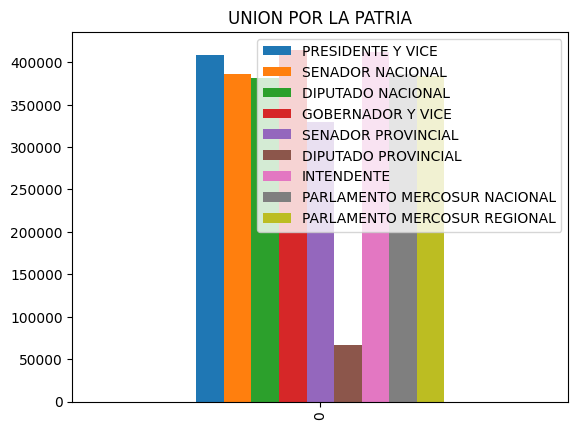

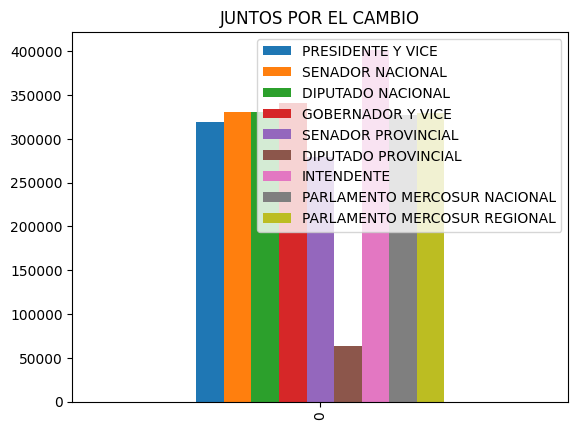

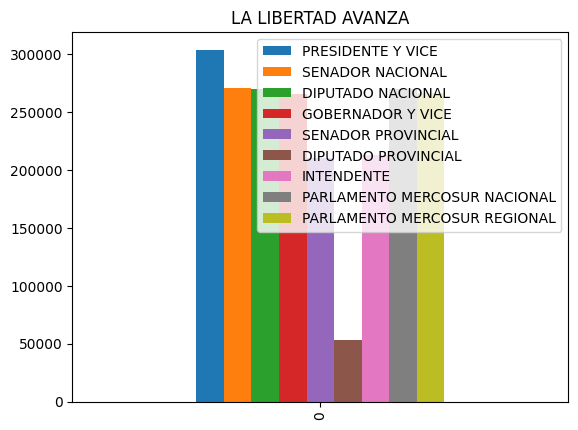

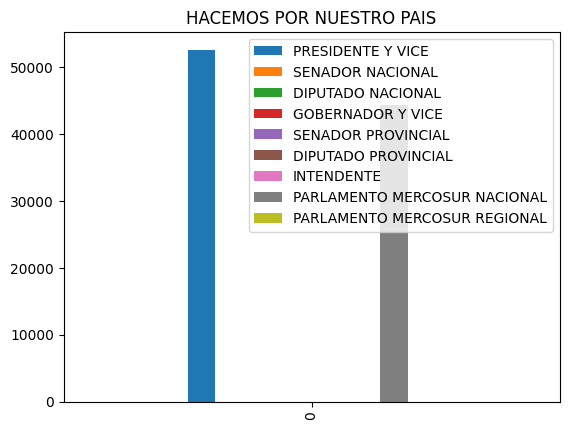

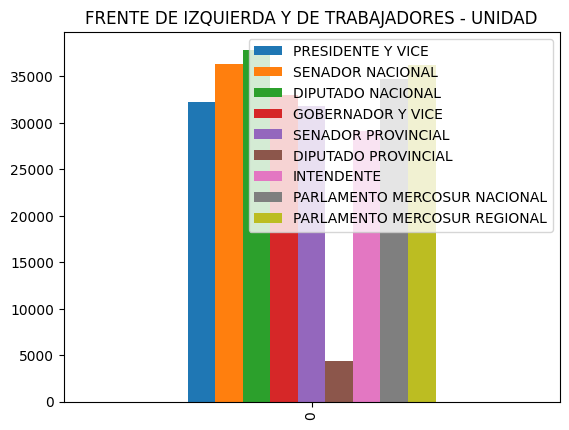

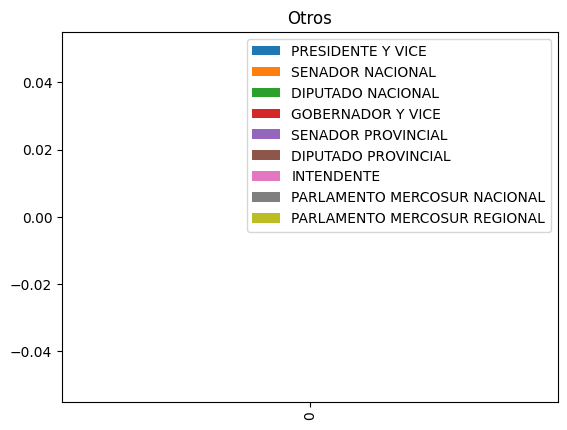

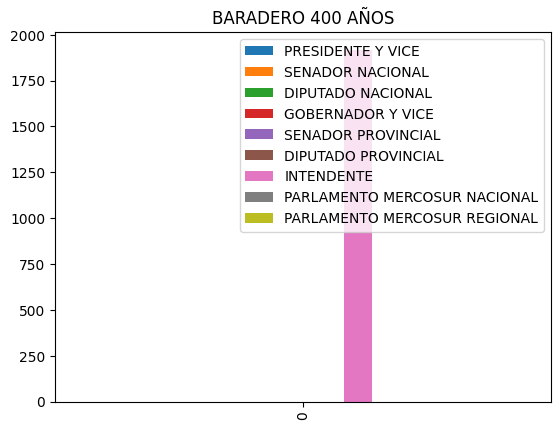

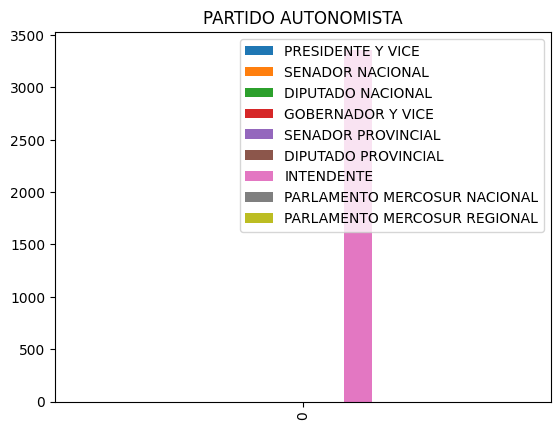

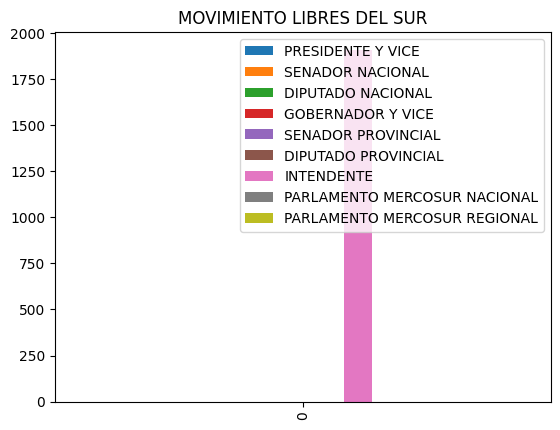

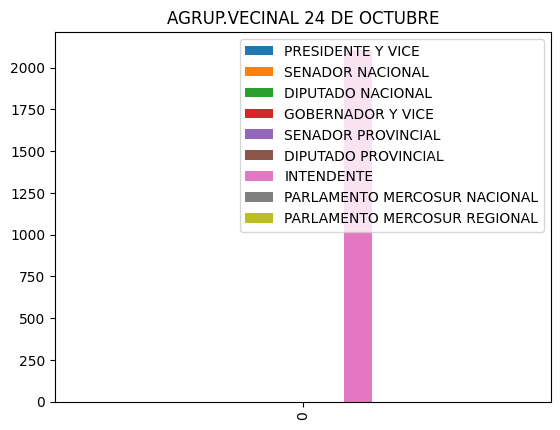

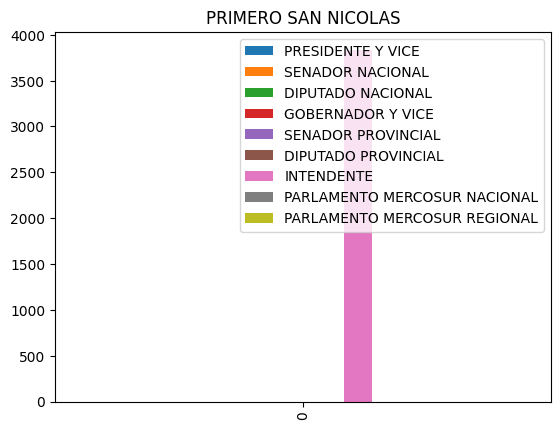

In [244]:
agrupaciones_copia = agrupaciones
agrupaciones_copia[5] = "Otros"
for a in range(len(agrupaciones_copia)):
    plot_df = pd.DataFrame(votos_por_agrupacion[a], index=df_g9['cargo_nombre'].unique().tolist()).T
    #plot_df = plot_df.set_axis(aa, axis=0)
    plot_df.plot.bar(title=agrupaciones_copia[a],xlabel='')